In [180]:
# Import libraries and dependencies
import os
import pandas as pd
import numpy as np
import alpaca_trade_api as tradeapi
import datetime as dt
from pathlib import Path
import seaborn as sns
import plotly.express as px

import hvplot.pandas
import hvplot.dask
import panel as pn
pn.extension('plotly')

In [181]:
cpi_path = Path("CPI_data.csv")
cpi_df = pd.read_csv(cpi_path, index_col = 'DATE', parse_dates=True, infer_datetime_format=True)
cpi_df.index = pd.to_datetime(cpi_df.index, format = '%Y/%m').strftime('%Y-%m')
cpi_df = cpi_df.sort_index()

In [182]:
housing_path = Path("Housing_data.csv")
housing_df = pd.read_csv(housing_path, index_col = 'DATE', parse_dates=True, infer_datetime_format=True)
housing_df.index = pd.to_datetime(housing_df.index, format = '%Y/%m').strftime('%Y-%m')
housing_df = housing_df.sort_index()

In [183]:
housing_df = housing_df.rename(columns={"MSPUS": "Median_Housing_Prices"})

In [184]:
combined_df = pd.concat([cpi_df,housing_df], axis='columns', join='inner')

In [185]:
csv_path = Path('../Project_1/FedBalanceSheet.csv')
fed_df = pd.read_csv(csv_path, index_col="DATE", parse_dates=True)
columns = ['FED BS']
fed_df.columns = columns
fed_df.index = pd.to_datetime(fed_df.index, format = '%Y/%m').strftime('%Y-%m')
fed_df = fed_df.reset_index().drop_duplicates(subset='index', keep='first').set_index('index')
fed_df.sort_index(inplace=True)

In [186]:
combo_df = pd.merge(fed_df, combined_df, how='inner', left_index=True, right_index=True)
combo_df.index = pd.to_datetime(combo_df.index)

In [187]:
combo_df['CPI / FED BS'] = combo_df['CPI']/combo_df['FED BS']
combo_df['Median_Housing_Prices / FED BS'] = combo_df['Median_Housing_Prices']/combo_df['FED BS']

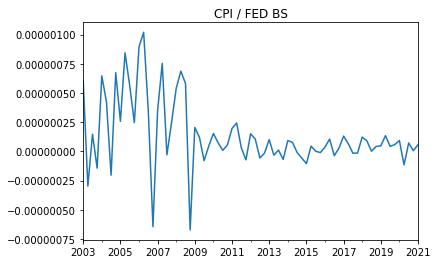

In [188]:
combo_df['CPI / FED BS'].plot.line(title = "CPI / FED BS")

In [189]:

#combo_df['CPI / FED BS'].hvplot.line(rot=90, Title='CPI / FED Balance Sheet')
from bokeh.models.formatters import DatetimeTickFormatter

formatter = DatetimeTickFormatter(months='%b %Y')
combo_df.hvplot(x='index', y="CPI / FED BS", title = "CPI / FED BS")


:Curve   [index]   (CPI / FED BS)

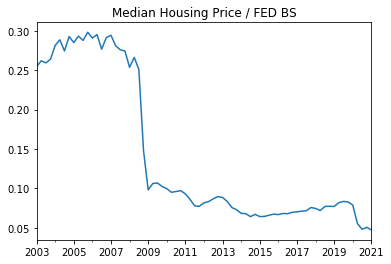

In [190]:
combo_df['Median_Housing_Prices / FED BS'].plot.line(title = "Median Housing Price / FED BS")

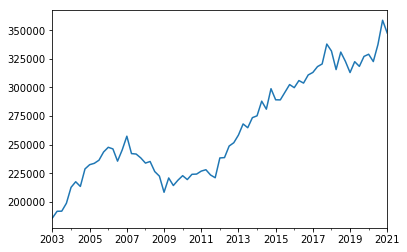

In [191]:
combo_df['Median_Housing_Prices'].plot.line()

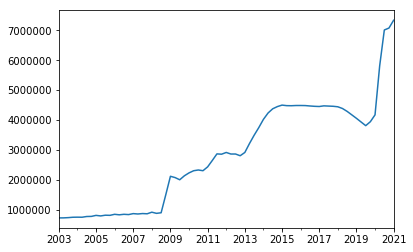

In [192]:
combo_df['FED BS'].plot.line()

In [193]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

True

In [194]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [195]:
# Set timeframe to '1D'
timeframe1 = "1D"

# Set start and end datetimes
start_date1 = pd.Timestamp("2007-01-01", tz="America/New_York").isoformat()
end_date1 = pd.Timestamp("2008-05-31", tz="America/New_York").isoformat()

# Set the ticker information
tickers1 = ["SPY","GOOG","GDX", "AMZN", "MSFT"]

# Get 3 year's worth of historical price data for SPY
df_ticker1 = api.get_barset(
    tickers1,
    timeframe1,
    start=start_date1,
    end=end_date1,
    limit=1000,
).df

In [196]:
# Set timeframe to '1D'
timeframe2 = "1D"

# Set start and end datetimes 
start_date2 = pd.Timestamp("2008-06-01", tz="America/New_York").isoformat()
end_date2 = pd.Timestamp("2011-05-31", tz="America/New_York").isoformat()

# Set the ticker information
tickers2 = ["SPY","GOOG","GDX", "AMZN", "MSFT"]

# Get 3 year's worth of historical price data for SPY
df_ticker2 = api.get_barset(
    tickers2,
    timeframe2,
    start=start_date2,
    end=end_date2,
    limit=1000,
).df


In [197]:
# Set timeframe to '1D'
timeframe3 = "1D"

# Set start and end datetimes 
start_date3 = pd.Timestamp("2011-06-01", tz="America/New_York").isoformat()
end_date3 = pd.Timestamp("2014-05-31", tz="America/New_York").isoformat()

# Set the ticker information
tickers3 = ["SPY","GOOG","GDX", "AMZN", "MSFT"]

# Get 3 year's worth of historical price data for SPY
df_ticker3 = api.get_barset(
    tickers3,
    timeframe3,
    start=start_date3,
    end=end_date3,
    limit=1000,
).df


In [198]:
# Set timeframe to '1D'
timeframe4 = "1D"

# Set start and end datetimes
start_date4 = pd.Timestamp("2014-06-01", tz="America/New_York").isoformat()
end_date4 = pd.Timestamp("2017-05-31", tz="America/New_York").isoformat()

# Set the ticker information
tickers4 = ["SPY","GOOG","GDX", "AMZN", "MSFT"]

# Get 3 year's worth of historical price data for SPY
df_ticker4 = api.get_barset(
    tickers4,
    timeframe4,
    start=start_date4,
    end=end_date4,
    limit=1000,
).df



In [199]:
# Set timeframe to '1D'
timeframe5 = "1D"

# Set start and end datetimes
start_date5 = pd.Timestamp("2017-06-01", tz="America/New_York").isoformat()
end_date5 = pd.Timestamp("2021-05-25", tz="America/New_York").isoformat()

# Set the ticker information
tickers5 = ["SPY","GOOG","GDX", "AMZN", "MSFT"]

# Get 3 year's worth of historical price data for SPY
df_ticker5 = api.get_barset(
    tickers5,
    timeframe5,
    start=start_date5,
    end=end_date5,
    limit=1000,
).df



In [200]:
# Concatenate the two DataFrames by rows and perform an inner join
df_ticker_total = pd.concat([df_ticker1, df_ticker2, df_ticker3, df_ticker4, df_ticker5], axis="rows", join="inner")


In [201]:
#Fetch the closing prices of SPY and GOOG
#df_closing_prices = pd.concat(df_ticker_total["SPY"]["close"], df_ticker_total["GOOG"]["close"])

dict_data = {'SPY':df_ticker_total["SPY"]["close"],'GOOG':df_ticker_total["GOOG"]["close"],
             'GDX':df_ticker_total["GDX"]["close"],'AMZN':df_ticker_total["AMZN"]["close"]
            ,'MSFT':df_ticker_total["MSFT"]["close"]
            }
df_closing_prices = pd.concat(dict_data, axis = 1)

#Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date
#df_closing_prices.index.names = ['DATE']



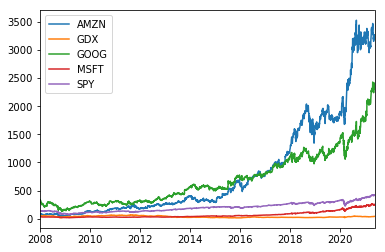

In [202]:
# Visualize distribution of closing price using a  plot
df_closing_prices.plot.line()

In [205]:
# Use the Pathlib libary to set the path to the CSV
csv_path = Path('../Project_1/FedBalanceSheet.csv')

In [206]:
# Use the file path to read the CSV into a DataFrame and display a few rows
fed_df = pd.read_csv(csv_path, index_col="DATE", parse_dates=True)
columns = ['FED BS']
fed_df.columns = columns


In [207]:
# Sort datetime index in ascending order (past to present)
fed_df.sort_index(inplace=True)
df_closing_prices.sort_index(inplace=True)


In [209]:
df2 = pd.merge(df_closing_prices, fed_df, left_index=True, right_index=True)


In [210]:
df2['SPY / FED BS'] = df2['SPY']/df2['FED BS']
df2['GOOG / FED BS'] = df2['GOOG']/df2['FED BS']
df2['GDX / FED BS'] = df2['GDX']/df2['FED BS']
df2['AMZN / FED BS'] = df2['AMZN']/df2['FED BS']
df2['MSFT / FED BS'] = df2['MSFT']/df2['FED BS']



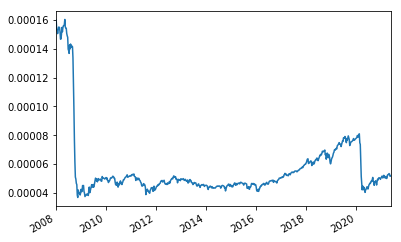

In [211]:
df2['SPY / FED BS'].plot.line()

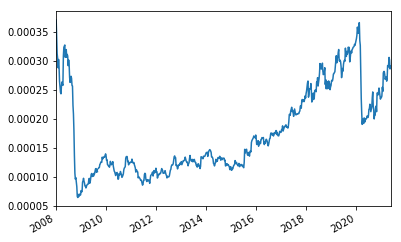

In [212]:
df2['GOOG / FED BS'].plot.line()

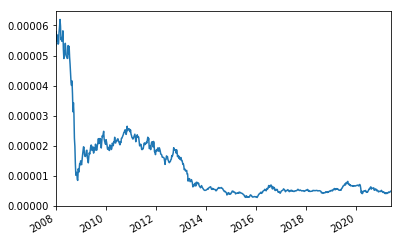

In [213]:
df2['GDX / FED BS'].plot.line()

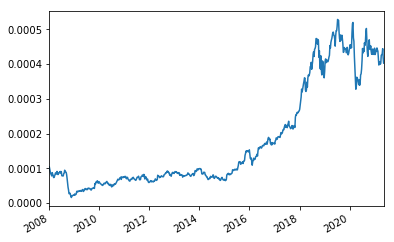

In [214]:
df2['AMZN / FED BS'].plot.line()

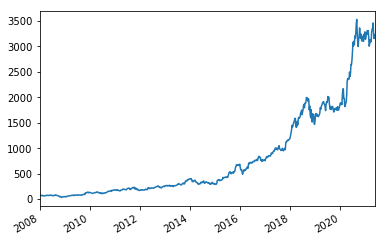

In [215]:
df2['AMZN'].plot.line()

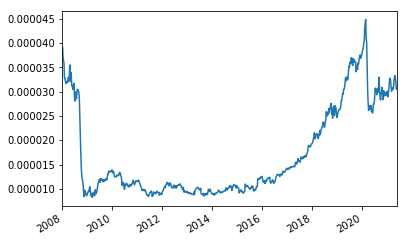

In [216]:
df2['MSFT / FED BS'].plot.line()

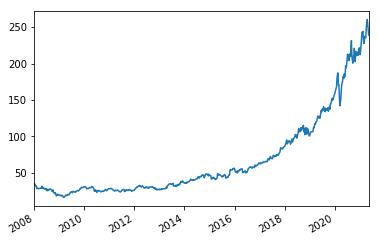

In [217]:
df2['MSFT'].plot.line()


In [218]:
#fed_yoy = fed_df.groupby
fed_df['Year'] = pd.to_datetime(fed_df.index, format = '%Y').strftime('%Y')


In [219]:
fed_yoy_df = fed_df.groupby('Year').mean().pct_change()


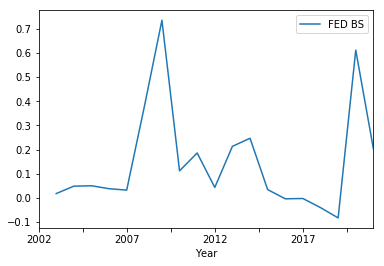

In [220]:
fed_yoy_df.plot.line()

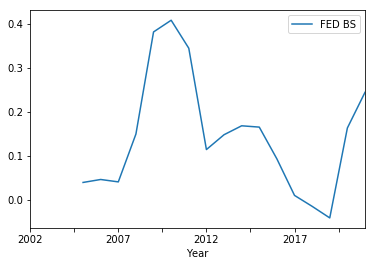

In [221]:
fed_yoy_df.rolling(window=3).mean().plot()

In [229]:
btc_csv = Path('btc.csv')
btc = pd.read_csv(btc_csv)
btc.dropna(inplace=True)
btc['Date'] = pd.to_datetime(btc['Date'], errors='coerce')
btc.set_index(btc['Date'],inplace=True)
btc.drop(columns=['Date'], inplace=True)
btc = btc.sort_index()

In [230]:
# Create btc closing price
btc_close = pd.DataFrame(btc["Price"], index=pd.to_datetime(btc.index))

In [231]:
btc_close.rename(columns = {"Price":"BTC"}, inplace=True)
btc_close= btc_close[btc_close.index.duplicated(keep='first')]


In [232]:
btc_close['BTC'] = btc_close['BTC'].str.replace(',', '')

In [233]:
btc_close['BTC'] = btc_close['BTC'].astype('float')

In [234]:
btc_df = pd.merge(btc_close, fed_df, left_index=True, right_index=True)


In [235]:
btc_df['BTC / FED BS'] = btc_df['BTC'] / btc_df['FED BS']

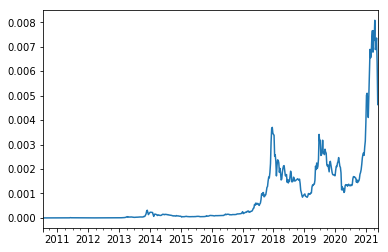

In [236]:
btc_df['BTC / FED BS'].plot.line()

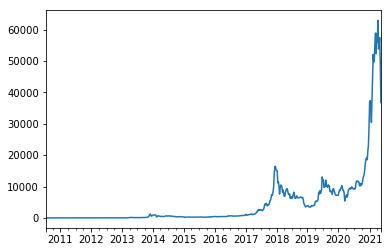

In [237]:
btc_df['BTC'].plot.line()

In [238]:
eth_csv = Path('eth.csv')
eth = pd.read_csv(
    eth_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
eth = eth.sort_index()


In [239]:
# Create btc closing price
eth_close = pd.DataFrame()

eth_close["ETH"] = eth["Price"]

eth_close.index = eth_close.index.date



In [240]:
eth_close['ETH'] = eth_close['ETH'].str.replace(',', '')
eth_close['ETH'] = eth_close['ETH'].astype('float')
eth_close.dtypes

ETH    float64
dtype: object

In [242]:
eth_df = pd.merge(eth_close, fed_df, left_index=True, right_index=True)


In [243]:
eth_df['ETH / FED BS'] = eth_df['ETH'] / eth_df['FED BS']

In [259]:
fed_bs = px.line(combo_df['FED BS'],
                title ="Federal Reserve Balance Sheet",
                labels={"index": "Date",  "value": "Balance"},
                )

median_housing = px.line(combo_df['Median_Housing_Prices'],               
                title ="Median Housing Prices",
                labels={"index": "Date",  "value": "Median Price"},
                )
                        
median_housing_fed = px.line(combo_df['Median_Housing_Prices / FED BS'],               
                title ="Median Housing Prices / FED BS",
                labels={"index": "Date"},
                )
                        

cpi = px.line(combo_df['CPI'],               
                title ="CPI",
                labels={"index": "Date",  "value": "Percent"},
                )
                        
cpi_fed = px.line(combo_df['CPI / FED BS'],               
                title ="CPI / FED BS",
                labels={"index": "Date"},
                )

spy = px.line(df2['SPY'],               
                title ="SPY",
                labels={"index": "Date",  "value": "Price"},
                )
                        
spy_fed = px.line(df2['SPY / FED BS'],               
                title ="SPY / FED BS",
                labels={"index": "Date"},
                )

msft = px.line(df2['MSFT / FED BS'],               
                title ="MSFT / FED BS",
                labels={"index": "Date"},
                )
                        
msft_fed = px.line(df2['MSFT'],               
                title ="MSFT",
                labels={"index": "Date",  "value": "Share Price"},
                )
                        

amzn = px.line(df2['AMZN'],               
                title ="AMZN",
                labels={"index": "Date",  "value": "Share Price"},
                )
                        
amzn_fed = px.line(df2['AMZN / FED BS'],               
                title ="AMZN / FED BS",
                labels={"index": "Date"},
                )
                        

goog = px.line(df2['GOOG'],               
                title ="GOOG",
                labels={"index": "Date",  "value": "Share Price"},
                )
                        
goog_fed = px.line(df2['GOOG / FED BS'],               
                title ="GOOG / FED BS",
                labels={"index": "Date"},
                )
                        

gdx = px.line(df2['GDX'],               
                title ="Gold - GDX",
                labels={"index": "Date",  "value": "Share Price"},
                )
                        
gdx_fed = px.line(df2['GDX / FED BS'],               
                title ="GDX / FED BS",
                labels={"index": "Date"},
                )
                        

btc = px.line(btc_df['BTC'],               
                title ="BTC",
                labels={"index": "Date",  "value": "Price"},
                )
                        
btc_fed = px.line(btc_df['BTC / FED BS'],               
                title ="BTC / FED BS",
                labels={"index": "Date"},
                )
                        

eth = px.line(eth_df["ETH"],               
                title ="ETH",
                labels={"index": "Date",  "value": "Price"},
                )
                        
eth_fed = px.line(eth_df['ETH / FED BS'],               
                title ="ETH / FED BS",
                labels={"index": "Date"},
                )
                        

In [260]:
#Rows
fed_bs_row = pn.Row(fed_bs)
median_housing_row = pn.Row(median_housing, median_housing_fed)
cpi_row = pn.Row(cpi, cpi_fed)
spy_row = pn.Row(spy, spy_fed)
msft_row = pn.Row(msft, msft_fed)
amzn_row = pn.Row(amzn, amzn_fed)
goog_row = pn.Row(goog, goog_fed)
gdx_row = pn.Row(gdx, gdx_fed)
btc_row = pn.Row(btc, btc_fed)
eth_fed_row = pn.Row(eth, eth_fed)

In [261]:
tabs = pn.Tabs(
    ("Federal Balance Sheet", fed_bs_row),
    ("Median Housing", median_housing_row),
    ("Consumer Price Index", cpi_row),
    ("S&P 500", spy_row),
    ("Microsoft", msft_row),
    ("Amazon", amzn_row),
    ("Google", goog_row),
    ("Gold", gdx_row),
    ("BTC", btc_row),
    ("Ethereum", eth_fed_row)
    )


In [262]:
title = pn.pane.Markdown("test")

In [263]:
dashboard = pn.Column(pn.Row(title), tabs, width = 900)


In [264]:
dashboard.servable()

Column(width=900)
    [0] Row
        [0] Markdown(str)
    [1] Tabs
        [0] Row
            [0] Plotly(Figure)
        [1] Row
            [0] Plotly(Figure)
            [1] Plotly(Figure)
        [2] Row
            [0] Plotly(Figure)
            [1] Plotly(Figure)
        [3] Row
            [0] Plotly(Figure)
            [1] Plotly(Figure)
        [4] Row
            [0] Plotly(Figure)
            [1] Plotly(Figure)
        [5] Row
            [0] Plotly(Figure)
            [1] Plotly(Figure)
        [6] Row
            [0] Plotly(Figure)
            [1] Plotly(Figure)
        [7] Row
            [0] Plotly(Figure)
            [1] Plotly(Figure)
        [8] Row
            [0] Plotly(Figure)
            [1] Plotly(Figure)
        [9] Row
            [0] Plotly(Figure)
            [1] Plotly(Figure)